![udacity-banner](https://miro.medium.com/max/1400/1*XV1XQlk4lCYcm-ft5-gMtw.jpeg)
## Udacity Connect Session - Week 10 - Data Visualization with Sample Dataset
# Agenda

* [Project 2 checkups](#)
* [Project 3 checkups](#)
* [Univariate Exploration](#)
* [Bivariate Exploration](#)
* [Multivariate Exploration](#)

# Project 2 - Wrangle and Analyze Data

![project2](https://video.udacity-data.com/topher/2017/October/59dd378f_dog-rates-social/dog-rates-social.jpg)

# Project 3 - Communicate Data Findings

![project3](https://big2smart.com/wp-content/uploads/2019/11/Data-Interpretation-.png)

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

### Dataset used in this tutorial

- [pokemon_df (pokemon dataset) - click to download](https://1drv.ms/u/s!Ag9pH02JWJmogZVd6DARdXWZ9idwgQ?e=Dnq3uA)
- df_titanic (titanic dataset) - downloaded with code
- [dice_df (dice roll dataset) - click to download](https://1drv.ms/u/s!Ag9pH02JWJmogZVg7rXrkjXz1FN0qQ?e=4Hw64G)
- stock_dataframe (stocks dataset) - downloaded with code
- [fuel_econ (fuel economy data set) - click  to download](https://1drv.ms/u/s!Ag9pH02JWJmogZVfp8ZZh6IXklpSFA?e=fU54Fj)

The Titanic Dataset

The titanic and titanic2 data frames describe the survival status of individual passengers on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

VARIABLE DESCRIPTIONS
- Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival Survival (0 = No; 1 = Yes)
- name Name
- sex Sex
- age Age
- sibsp Number of Siblings/Spouses Aboard
- parch Number of Parents/Children Aboard
- ticket Ticket Number
- fare Passenger Fare (British pound)
- cabin Cabin
- embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat Lifeboat
- body Body Identification Number
- home.dest Home/Destination

In [2]:
# import the titanic dataset - may have slight differences

df_titanic = sb.load_dataset('titanic')
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

### Bar Charts

Seaborn countplot() versus barplot()

Seaborn has two different functions that it can use to create bar charts: barplot() and countplot(). They both produce bar charts, though the logic behind these charts are fundamentally different.

The **barplot() creates a bar plot where each bar represents a summary statistic for each category. By default, it generates the mean for each category**. This means that the height of each bar represents the mean of that category.

The **countplot() on the other hand generates a bar for each category, where the height represents, well, the count (frequency)** of each category.

#### Bar Plots

In [417]:
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True

### Note the barplots shows bi-variate exploration just as a demonstration of what you can do with seaborn barplot

<AxesSubplot:xlabel='class', ylabel='age'>

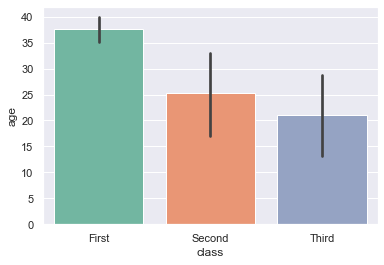

In [419]:
# respective age of people in each of the classes

sb.barplot(data=df_titanic, x="class", y="age")

We use matplotlib to change the tile and axis labels. We can use the 
- plt.title(), 
- plt.xlabel(), and 
- plt.ylabel() 

functions to change our titles.

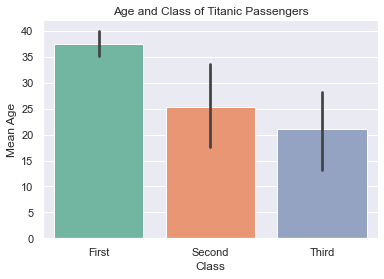

In [422]:
sb.barplot(data=df_titanic, x="class", y="age")

# add titles and lables
plt.title('Age and Class of Titanic Passengers')
plt.xlabel('Class')
plt.ylabel('Mean Age')

# removing the right and top borders of the axes
sb.despine()

plt.show()

By default, they show the confidence interval of the mean. 

Seaborn uses a bootstrapping technique to calculate (by default, a 95%) confidence interval that this mean will be replicated with different samples. 

By this logic, a confidence interval of 95% indicates that Seaborn estimates that 95% of the time, similar means will fall within the range of the bar.

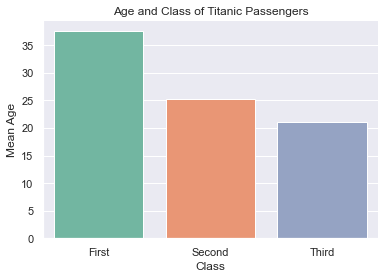

In [423]:
# Remove the bars by passing ci=None
sb.barplot(data=df_titanic, x="class", y="age", ci=None)

# add titles and lables
plt.title('Age and Class of Titanic Passengers')
plt.xlabel('Class')
plt.ylabel('Mean Age')

# removing the right and top borders of the axes
sb.despine()

plt.show()

# Univariate Exploration of Data

#### Count plots - Univariate Exploration

A fairly conventional use of the barplot is to show how often an item occurs in a given category. For this, we can use the sb.countplot() 

In [3]:
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

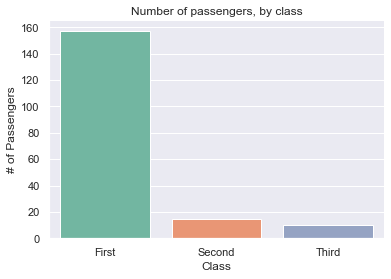

In [424]:
sb.set_style('darkgrid') # set grid color
sb.set_palette('Set2') # set color palette

# plotting the chart
sb.countplot(data=df_titanic, x="class")

plt.title('Number of passengers, by class')
plt.xlabel('Class')
plt.ylabel('# of Passengers')

# removing the right and top borders of the axes
sb.despine()

plt.show()

#### Horizontal Bar charts

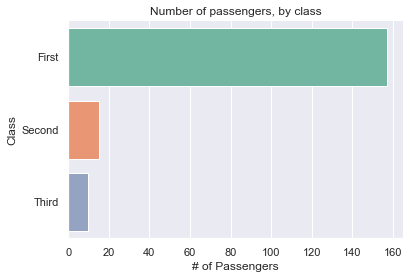

In [425]:
sb.set_style('darkgrid') # set grid color
sb.set_palette('Set2') # set color palette

# plotting the chart
sb.countplot(data=df_titanic, y="class") #change x axis to y to re-orient the graph, remember the labels too

plt.title('Number of passengers, by class')
plt.ylabel('Class')
plt.xlabel('# of Passengers')

# removing the right and top borders of the axes
sb.despine()

plt.show()

### Pie Charts

The Python data visualization library Seaborn doesn’t have a default function to create pie charts, but you can use the following syntax in Matplotlib to create a pie chart and add a Seaborn color palette:

In [199]:
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

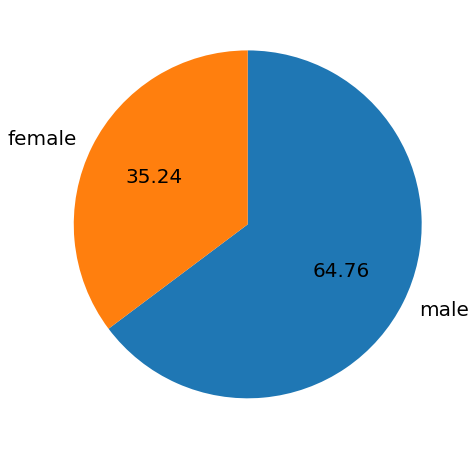

In [11]:
#plotting using plt.pie matplotlib

sex_val = df_titanic['sex'].value_counts()

plt.figure(figsize=[10,8])

plt.pie(sex_val, startangle = 90, labels=sex_val.index, autopct='%.2f', counterclock = False, textprops={'fontsize': 20});

#  autopct='%.2f' - places the values in the sections

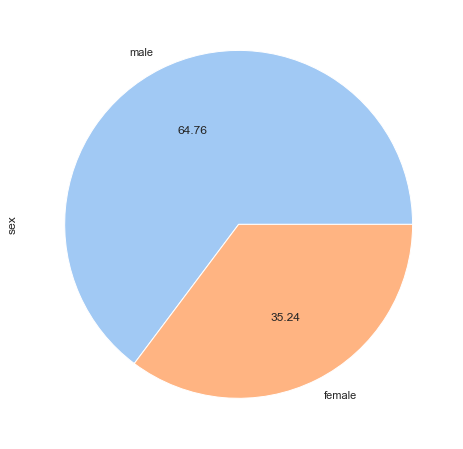

In [202]:
#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=[10,8])
df_titanic.sex.value_counts().plot(kind="pie", labels=df_titanic.sex.values, autopct='%0.2f', colors = colors)

plt.show()

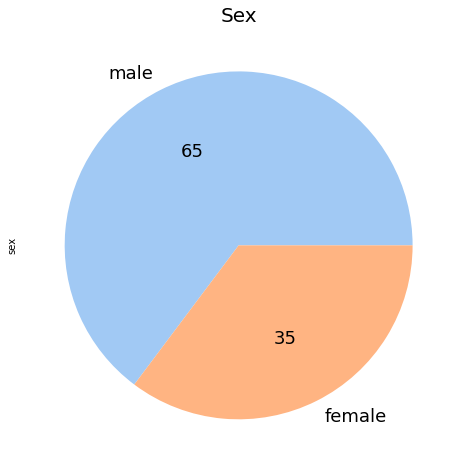

In [15]:
#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=[10,8])
df_titanic['sex'].value_counts().plot(kind="pie", labels=df_titanic.sex.values, autopct='%0.0f', colors = colors, textprops={'fontsize': 18})

#increase size of title
plt.title('Sex', fontsize=20) #
plt.show()

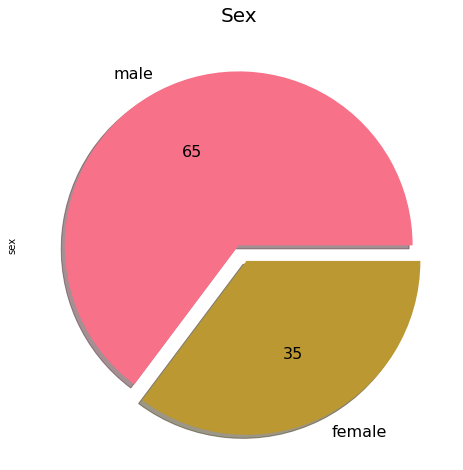

In [20]:
#define Seaborn color palette to use
colors = sb.color_palette('husl')[0:5] #check color pallete for more colors

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)  

#create pie chart
plt.figure(figsize=[10,8])
df_titanic['sex'].value_counts().plot(kind="pie", labels=df_titanic.sex.values, autopct='%0.0f', 
                                      colors = colors, textprops={'fontsize': 16},  explode=explode, shadow=True) #explodes the chart

# explode = explodes the sections or fragments the chart
# shadow=True - add shadow

plt.title('Sex', fontsize=20)
plt.show()


[seaborn color pallete](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

### Donut Chart

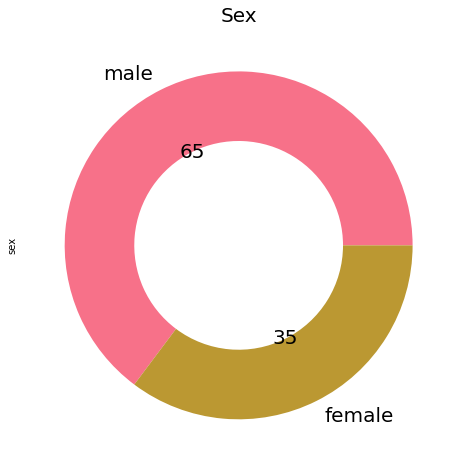

In [25]:
#define Seaborn color palette to use
colors = sb.color_palette('husl')[0:5] #check color pallete for more colors


#create pie chart
plt.figure(figsize=[10,8])
df_titanic['sex'].value_counts().plot(kind="pie", labels=df_titanic.sex.values, autopct='%0.0f', colors = colors, 
                                      textprops={'fontsize': 20}, wedgeprops = {'width' : 0.4})

# wedgeprops - creates the donut chart'
# text props - adjust fontsize of labels

plt.title('Sex', fontsize=20)
plt.show()


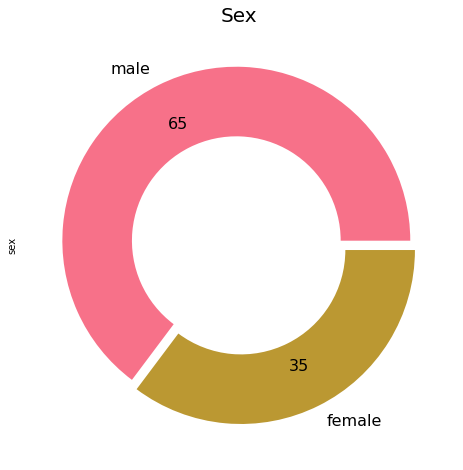

In [28]:
#define Seaborn color palette to use
colors = sb.color_palette('husl')[0:5] #check color pallete for more colors

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.03, 0.03)  

#create pie chart
plt.figure(figsize=[10,8])

#adjust the text position and explod the donut chart
df_titanic['sex'].value_counts().plot(kind="pie", labels=df_titanic.sex.values, autopct='%0.0f', colors = colors, textprops={'fontsize': 16}, 
                              explode=explode, wedgeprops = {'width' : 0.4}, pctdistance=0.75) #explodes the chart

# pcddistance - adjust the position of the values

plt.title('Sex', fontsize=20)
plt.show()


### Histograms

In [207]:
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

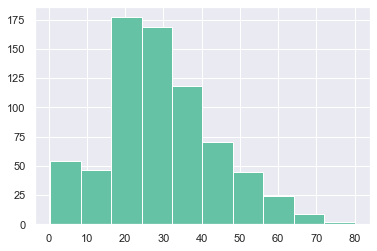

In [209]:
#histogram with matplotlib
plt.hist(df_titanic.age, bins=10);

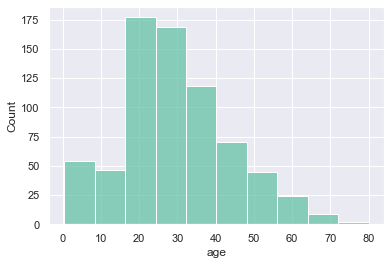

In [208]:
#histogram with seaborn
sb.histplot(data=df_titanic, x="age", bins=10);

### Kernel Density Estimation (KDE)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

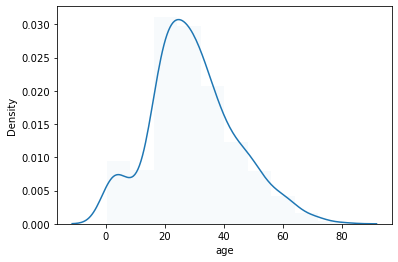

In [33]:
# seaborn using distplot(deprecated), kernel density estimation & transparency for the dist plot

sb.distplot(df_titanic.age, bins=10, kde=True, hist_kws = {'alpha' : 0.03})

### Figures, Axes and Supblots

![axes and figures](https://matplotlib.org/1.5.1/_images/fig_map.png)

Figure

The whole figure (marked as the outer red box). The figure keeps track of all the child Axes, a smattering of ‘special’ artists (titles, figure legends, etc), and the canvas. (Don’t worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

Axes

This is what you think of as ‘a plot’, it is the region of the image with the data space (marked as the inner blue box). A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and it’s member functions are the primary entry point to working with the OO interface.

Axis
These are the number-line-like objects (circled in green). They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

Artist
Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

Text(0.5, 0.98, 'A single ax with no data')

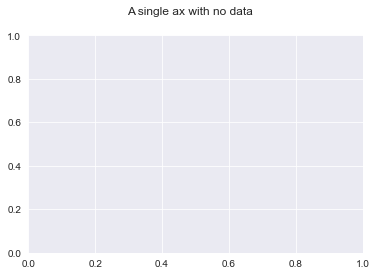

In [133]:
# One axes (ax) with no data

fig, ax = plt.subplots()
fig.suptitle('A single ax with no data')

Text(0.5, 0.98, '1 row x 2 columns axes with no data')

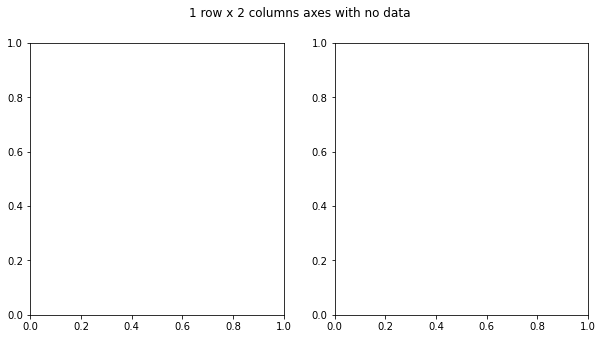

In [42]:
# Two ax sample - one row, 2 columns, 

fig, axes = plt.subplots(1, 2, figsize=(10,5))

fig.suptitle('1 row x 2 columns axes with no data')

Text(0.5, 0.98, '2 rows x 2 columns axes with no data')

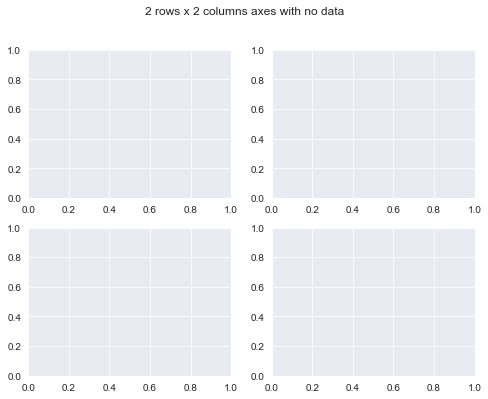

In [148]:
# Two ax sample - 2 rows, 2 columns, 

fig, axes = plt.subplots(2, 2, figsize=(8,6))

fig.suptitle('2 rows x 2 columns axes with no data')

Text(0.5, 0.98, '2 rows x 3 columns axes with no data')

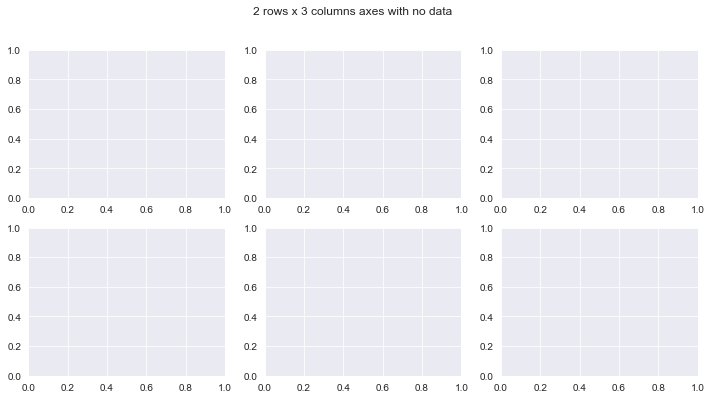

In [164]:
# Two ax sample - 2 rows, 3 columns

fig, axes = plt.subplots(2, 3, figsize=(12,6))

fig.suptitle('2 rows x 3 columns axes with no data')

In [35]:
pokemon_df = pd.read_csv('pokemon.csv', index_col=False)
pokemon_df.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

In [13]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


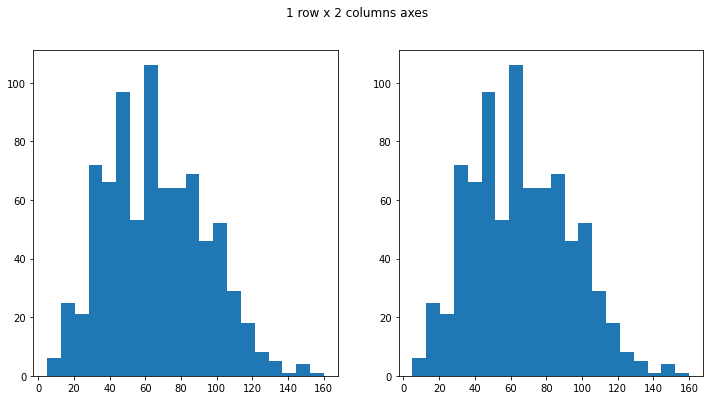

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('1 row x 2 columns axes')

# subplot in 1st row and 1st column
plt.subplot(1, 2, 1)
plt.hist(data = pokemon_df, x = 'speed', bins =20);


# subplot in 1st row and 2nd column
plt.subplot(1, 2, 2)
plt.hist(data = pokemon_df, x = 'speed', bins =20);


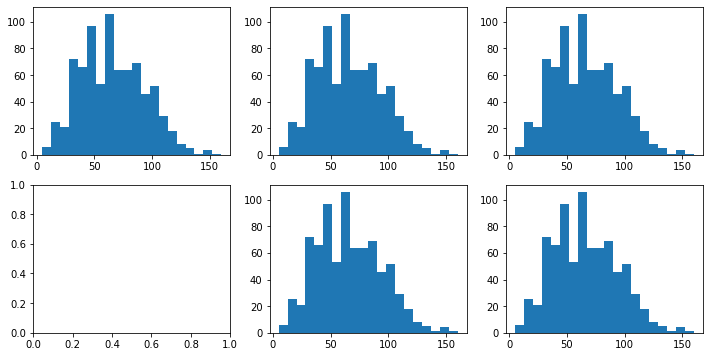

In [46]:
# Two ax sample - 2 rows, 3 columns, 

fig, axes = plt.subplots(2, 3, figsize=(12,6))

plt.subplot(2, 3, 1)
plt.hist(data = pokemon_df, x = 'speed', bins =20);

plt.subplot(2, 3, 2)
plt.hist(data = pokemon_df, x = 'speed', bins =20);

plt.subplot(2, 3, 3)
plt.hist(data = pokemon_df, x = 'speed', bins =20);

plt.subplot(2, 3, 5)
plt.hist(data = pokemon_df, x = 'speed', bins =20);


plt.subplot(2, 3, 6)
plt.hist(data = pokemon_df, x = 'speed', bins =20);


### Discrete Data

If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.

Here, the discrete means non-continuous values. In general, a discrete variable can be assigned to any of the limited (countable) set of values from a given set/range, for example, the number of family members, number of football matches in a tournament, number of departments in a university.

The quantitative term shows that it is the outcome of the measurement of a quantity.

In [213]:
dice_df =pd.read_csv('die_rolls.csv')
dice_df.head()

Dice  Trial 1  Trial 2  Sum
0     1        4        1    5
1     2        4        5    9
2     3        2        6    8
3     4        6        3    9
4     5        3        6    9

In [ ]:
#

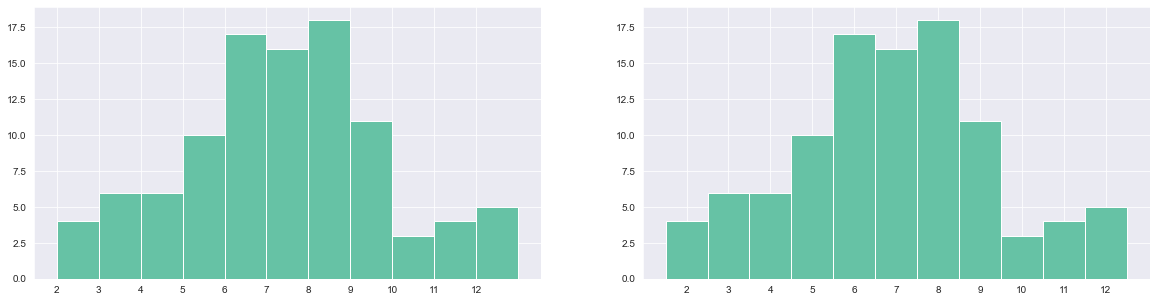

In [217]:
# Shifting the edges of the bars can remove ambiguity in the case of Discrete data

plt.figure(figsize = [20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(data=dice_df, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));


# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=dice_df, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

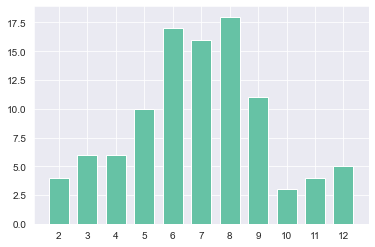

In [227]:
# Making gaps between individual bars
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=dice_df, x='Sum', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

# rwidth = 0.7 - spaces out the histogram

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. 

# Bivariate Exploration of Data

In [27]:
pokemon_df.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

In [37]:
pokemon_bubble = pokemon_df[pokemon_df.type_2.isin(['flying','poison','dragon'])].dropna()
pokemon_bubble

id     species  generation_id  height  weight  base_experience  type_1  \
0      1   bulbasaur              1     0.7     6.9               64   grass   
1      2     ivysaur              1     1.0    13.0              142   grass   
2      3    venusaur              1     2.0   100.0              236   grass   
5      6   charizard              1     1.7    90.5              240    fire   
11    12  butterfree              1     1.1    32.0              178     bug   
..   ...         ...            ...     ...     ...              ...     ...   
779  780      drampa              7     3.0   185.0              170  normal   
792  793    nihilego              7     1.2    55.5              257    rock   
796  797  celesteela              7     9.2   999.9              257   steel   
798  799    guzzlord              7     5.5   888.0              257    dark   
803  804   naganadel              7     3.6   150.0              243  poison   

     type_2   hp  attack  defense  speed  special-attack  special-defense  
0    poison   45      49       49     45              65               65  
1    poison   60      62       63     60              80               80  
2    poison   80      82       83     80             100              100  
5    flying   78      84       78    100             109               85  
11   flying   60      45       50     70              90               80  
..      ...  ...     ...      ...    ...             ...              ...  
779  dragon   78      60       85     36             135               91  
792  poison  109      53       47    103             127              131  
796  flying   97     101      103     61             107              101  
798  dragon  223     101       53     43              97               53  
803  dragon   73      73       73    121             127               73  

[145 rows x 14 columns]

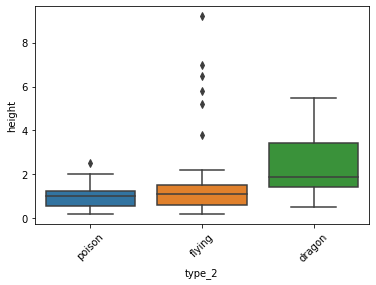

In [38]:
sb.boxplot(data=pokemon_bubble, x='type_2', y='height')
plt.xticks(rotation = 45);

### Scatter Plots

In [229]:
pokemon_df.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

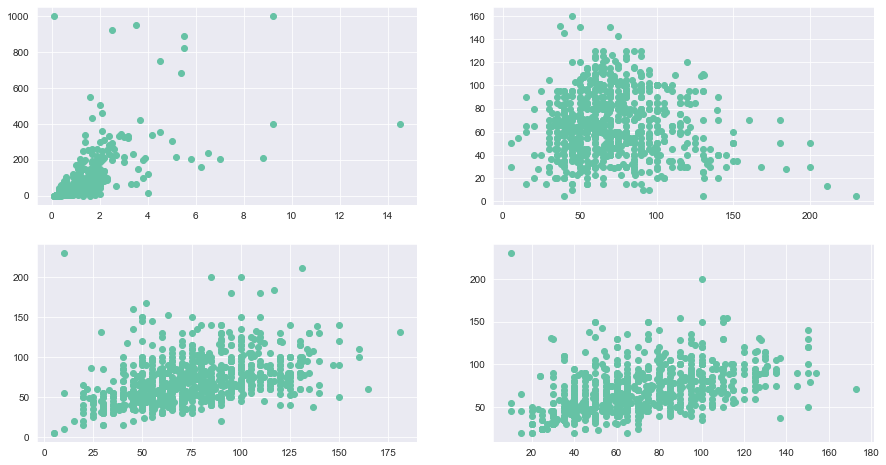

In [239]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))

plt.subplot(2, 2, 1)
plt.scatter(pokemon_df.height, pokemon_df.weight)

plt.subplot(2, 2, 2)
plt.scatter(pokemon_df.defense, pokemon_df.speed)

plt.subplot(2, 2, 3)
plt.scatter(pokemon_df.attack, pokemon_df.defense)

plt.subplot(2, 2, 4)
plt.scatter(pokemon_df['special-attack'], pokemon_df['special-defense'])

In [16]:
pokemon_df

id      species  generation_id  height  weight  base_experience  \
0      1    bulbasaur              1     0.7     6.9               64   
1      2      ivysaur              1     1.0    13.0              142   
2      3     venusaur              1     2.0   100.0              236   
3      4   charmander              1     0.6     8.5               62   
4      5   charmeleon              1     1.1    19.0              142   
..   ...          ...            ...     ...     ...              ...   
802  803      poipole              7     0.6     1.8              189   
803  804    naganadel              7     3.6   150.0              243   
804  805    stakataka              7     5.5   820.0              257   
805  806  blacephalon              7     1.8    13.0              257   
806  807      zeraora              7     1.5    44.5              270   

       type_1  type_2  hp  attack  defense  speed  special-attack  \
0       grass  poison  45      49       49     45              65   
1       grass  poison  60      62       63     60              80   
2       grass  poison  80      82       83     80             100   
3        fire     NaN  39      52       43     65              60   
4        fire     NaN  58      64       58     80              80   
..        ...     ...  ..     ...      ...    ...             ...   
802    poison     NaN  67      73       67     73              73   
803    poison  dragon  73      73       73    121             127   
804      rock   steel  61     131      211     13              53   
805      fire   ghost  53     127       53    107             151   
806  electric     NaN  88     112       75    143             102   

     special-defense  
0                 65  
1                 80  
2                100  
3                 50  
4                 65  
..               ...  
802               67  
803               73  
804              101  
805               79  
806               80  

[807 rows x 14 columns]

### Overplotting, Transparency and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

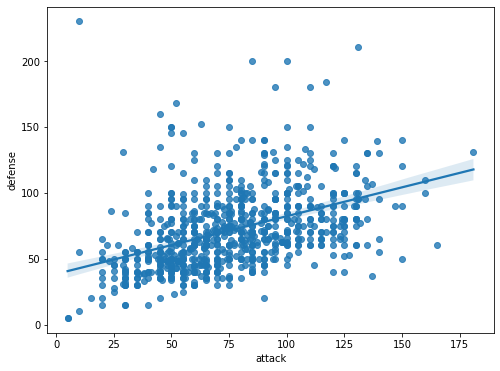

In [112]:
# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 

plt.figure(figsize=[8,6])
sb.regplot(data = pokemon_df, x='attack', y='defense', truncate=True);

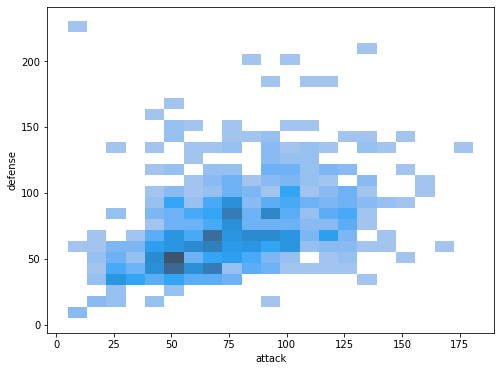

In [111]:
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3

plt.figure(figsize=[8,6])
sb.histplot(data = pokemon_df, x='attack', y='defense');

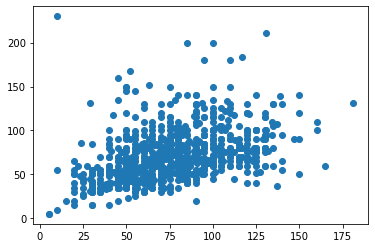

In [113]:
plt.scatter(data = pokemon_df, x='attack', y='defense')

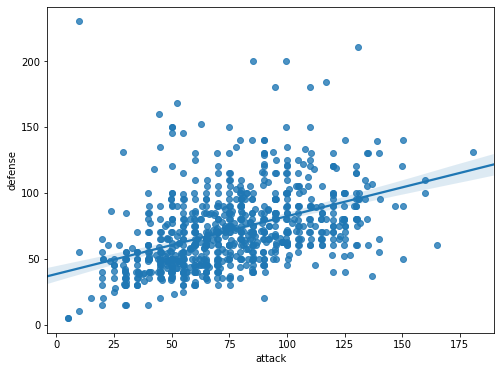

In [114]:
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3

plt.figure(figsize=[8,6])
sb.regplot(data = pokemon_df, x='attack', y='defense', truncate=False, x_jitter=0.3);

### Plot with both Jitter and Transparency

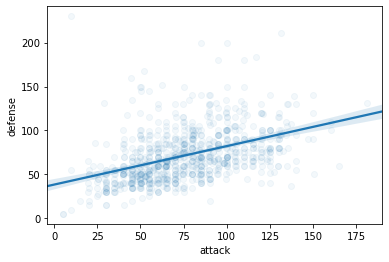

In [116]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 

sb.regplot(data = pokemon_df, x='attack', y='defense', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

### Heatmaps

Heatmaps are a great tool for creating beautiful figures and can provide us with insights on trends and allow us to easily identify potential outliers within a dataset.

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color.

In [48]:
df_titanic = df_titanic.dropna()
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True

The correlation matrix provides us with an indication of how well (or not so well) each feature is correlated with each other. The returned value will be between -1 and +1, with higher correlations tending toward these endpoints, and poorer correlations tending towards 0.

<AxesSubplot:>

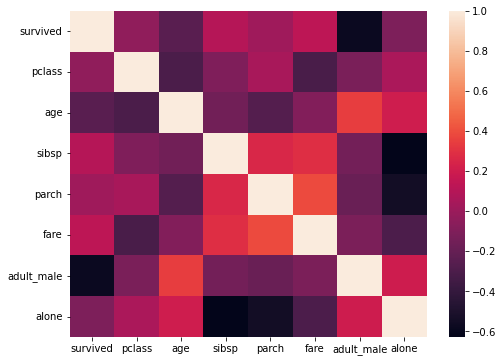

In [49]:
# correlation with heat map
plt.figure(figsize=[8,6])

corr = df_titanic.corr()
sb.heatmap(corr)

Add or change color

<AxesSubplot:>

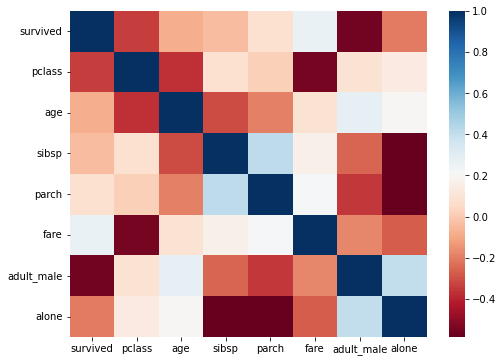

In [67]:
# correlation with heat map
plt.figure(figsize=[8,6])

sb.heatmap(corr, cmap='RdBu') #change colour

<AxesSubplot:>

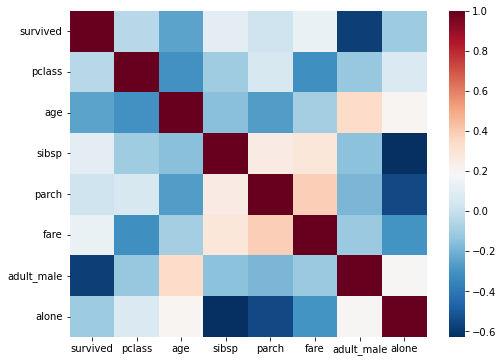

In [54]:
# correlation with heat map
plt.figure(figsize=[8,6])

sb.heatmap(corr, cmap='RdBu_r') #reverse colour

**[Cmap color palette](https://matplotlib.org/stable/tutorials/colors/colormaps.html)**

We can control this range so that it is equal by using the vmin and vmax arguments and setting them to -1 and +1 respectively.

<AxesSubplot:>

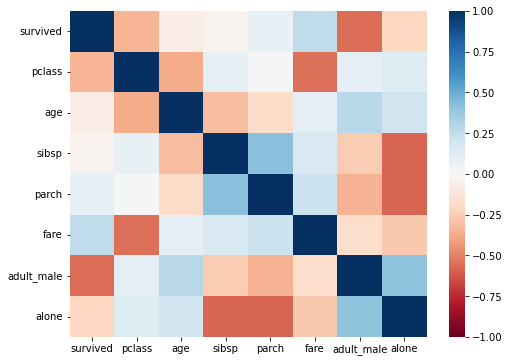

In [93]:
# correlation with heat map
plt.figure(figsize=[8,6])

sb.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)

The returned heatmap now has colour values that are balanced between positive and negative values.

If we look up a particular cell’s colour on the colour bar, we may not get an accurate reading. However, if we add the numbers to the heatmap we can instantly see the values and still retain the variation in colour.

To add numbers to our heatmap we simply add-in annot=True.

<AxesSubplot:>

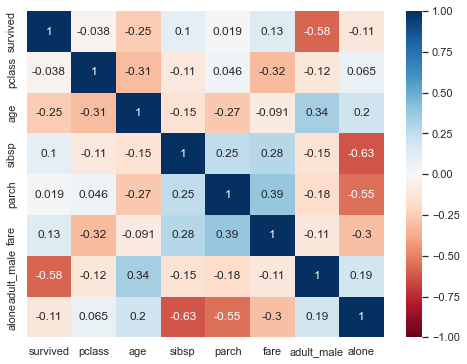

In [214]:
# correlation with heat map
plt.figure(figsize=[8,6])

sb.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

If we want to control the font size and font weight of our annotations, we can call upon the annot_kws and pass in a dictionary. In this example, I am changing the fontsize to 11 and setting the fontweight to bold.

<AxesSubplot:>

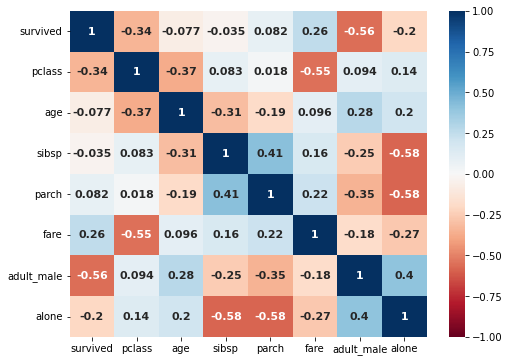

In [73]:
# correlation with heat map
plt.figure(figsize=[8,6])

sb.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'})

### hist2d

A heat map can also be implemented with Matplotlib's hist2d() function.

C:\Users\Dipson\AppData\Local\Temp\ipykernel_12836\3145229193.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(data = df_titanic, x = 'age', y = 'fare', );


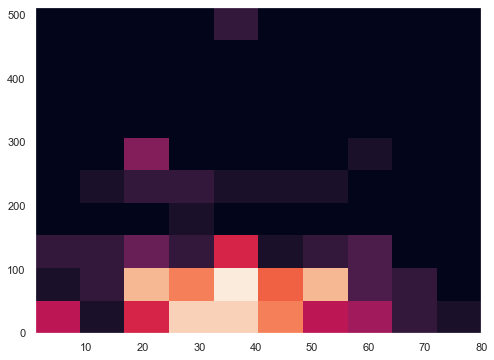

In [407]:
# hist2d with heat map
plt.figure(figsize=[8,6])

plt.hist2d(data = df_titanic, x = 'age', y = 'fare', );

To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette

C:\Users\Dipson\AppData\Local\Temp\ipykernel_12836\3106886205.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(data = df_titanic, x = 'age', y = 'fare', cmin=0.5, cmap='viridis_r',);


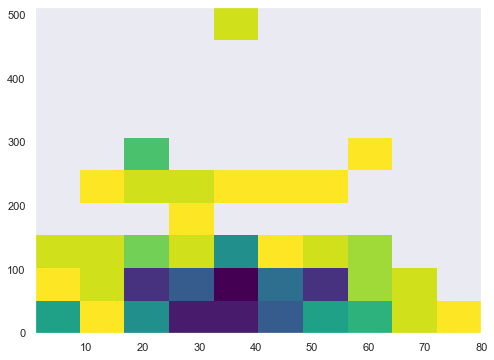

In [406]:
# correlation with heat map
plt.figure(figsize=[8,6])

plt.hist2d(data = df_titanic, x = 'age', y = 'fare', cmin=0.5, cmap='viridis_r',);

### Violin & Boxplots

In [27]:
pokemon_df.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

In [39]:
pokemon_box = pokemon_df[pokemon_df.type_2.isin(['flying','poison','dragon'])].dropna()
pokemon_box

id     species  generation_id  height  weight  base_experience  type_1  \
0      1   bulbasaur              1     0.7     6.9               64   grass   
1      2     ivysaur              1     1.0    13.0              142   grass   
2      3    venusaur              1     2.0   100.0              236   grass   
5      6   charizard              1     1.7    90.5              240    fire   
11    12  butterfree              1     1.1    32.0              178     bug   
..   ...         ...            ...     ...     ...              ...     ...   
779  780      drampa              7     3.0   185.0              170  normal   
792  793    nihilego              7     1.2    55.5              257    rock   
796  797  celesteela              7     9.2   999.9              257   steel   
798  799    guzzlord              7     5.5   888.0              257    dark   
803  804   naganadel              7     3.6   150.0              243  poison   

     type_2   hp  attack  defense  speed  special-attack  special-defense  
0    poison   45      49       49     45              65               65  
1    poison   60      62       63     60              80               80  
2    poison   80      82       83     80             100              100  
5    flying   78      84       78    100             109               85  
11   flying   60      45       50     70              90               80  
..      ...  ...     ...      ...    ...             ...              ...  
779  dragon   78      60       85     36             135               91  
792  poison  109      53       47    103             127              131  
796  flying   97     101      103     61             107              101  
798  dragon  223     101       53     43              97               53  
803  dragon   73      73       73    121             127               73  

[145 rows x 14 columns]

### Box plot

A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot *leans more on summarization of the data*, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. 

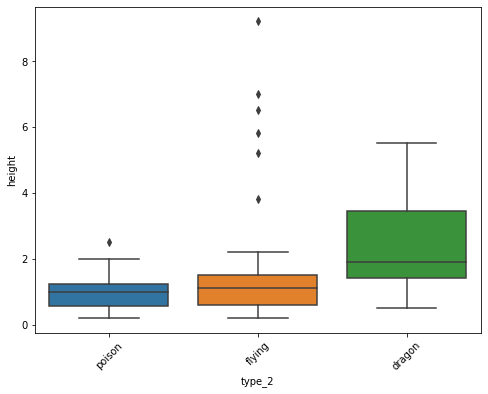

In [52]:
# box plot
plt.figure(figsize=[8,6])
sb.boxplot(data=pokemon_box, x='type_2', y='height')
plt.xticks(rotation = 45);

<AxesSubplot:xlabel='height', ylabel='type_2'>

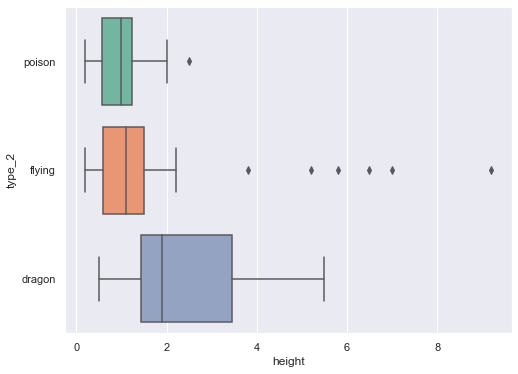

In [408]:
# horizontal

plt.figure(figsize=[8,6])
sb.boxplot(data=pokemon_box, y='type_2', x='height')

### Violin Plots

There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram.

<AxesSubplot:xlabel='type_2', ylabel='height'>

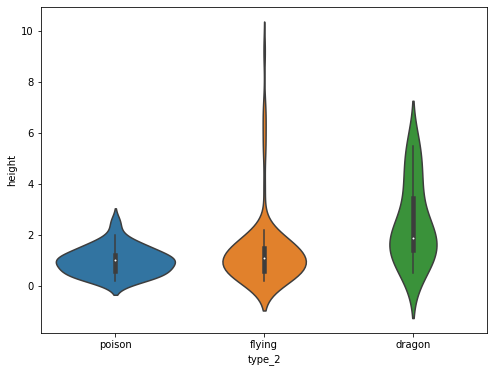

In [51]:
plt.figure(figsize=[8,6])
sb.violinplot(data=pokemon_box, x='type_2', y='height')

<AxesSubplot:xlabel='type_2', ylabel='height'>

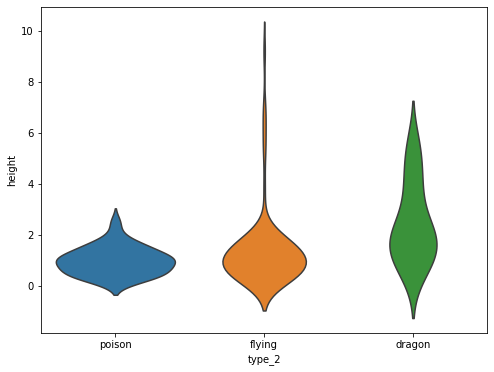

In [56]:
# without the inner box plot

plt.figure(figsize=[8,6])
sb.violinplot(data=pokemon_box, x='type_2', y='height', inner=None)

<AxesSubplot:xlabel='type_2', ylabel='height'>

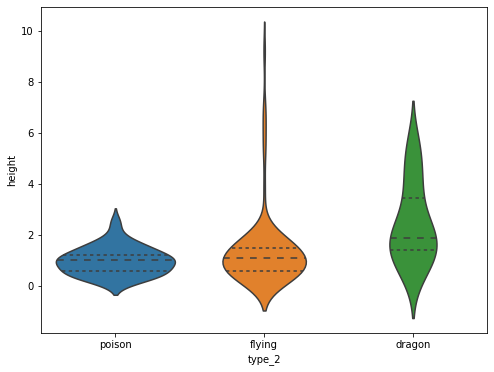

In [57]:
# showing the quartiles

plt.figure(figsize=[8,6])
sb.violinplot(data=pokemon_box, x='type_2', y='height', inner = 'quartile')

### Categorical Variables Analysis

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart.

Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret

In [216]:
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True

<AxesSubplot:xlabel='who', ylabel='count'>

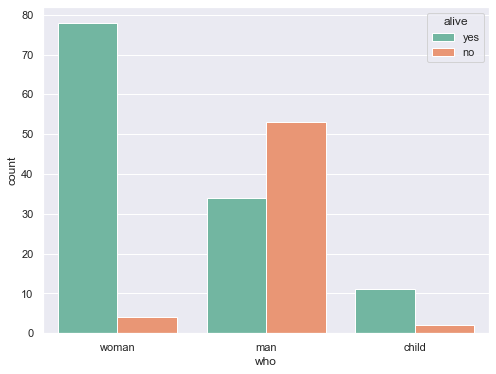

In [227]:
# who is alive - who survived the most

plt.figure(figsize=[8,6])
sb.countplot(data=df_titanic, x='who', hue='alive')

<AxesSubplot:xlabel='sex', ylabel='count'>

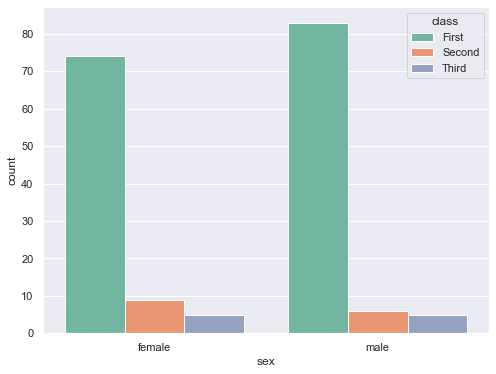

In [218]:
# gender in each class of cabin

plt.figure(figsize=[8,6])
sb.countplot(data=df_titanic, x='sex', hue='class')

### Stacked bar charts

A stacked bar plot is a visual representation of a data set in which the category is highlighted with certain shapes such as rectangles. The data provided in the dataset is represented by the length and heights of the bar chart.

A stacked bar plot is a type of graph where each bar is graphically divided into sub bars to show numerous columns of data at the same time.

In [219]:
df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True

In [251]:
# isolate the columns to be plotted

df_titanic_grouped1 = df_titanic.groupby('sex').sum()
df_titanic_grouped1

survived  pclass      age  sibsp  parch       fare  adult_male  alone
sex                                                                          
female        82     107  2875.50     47     48  7832.0792           0     32
male          41     110  3607.92     38     39  6531.3126          87     46

In [409]:
df_titanic_grouped2 = df_titanic_grouped1[['survived','alone']]
df_titanic_grouped2.sex=df_titanic_grouped2.index #add new index column
df_titanic_grouped2

C:\Users\Dipson\AppData\Local\Temp\ipykernel_12836\811806505.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_titanic_grouped2.sex=df_titanic_grouped2.index #add new index column


survived  alone
class                  
First        106     64
Second        12     10
Third          5      4

<AxesSubplot:xlabel='class'>

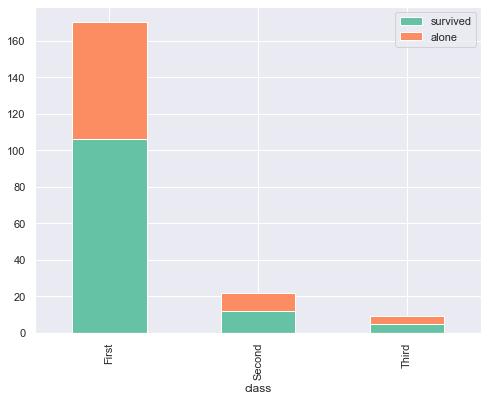

In [410]:
# gender that survived or are alone based on class

df_titanic_grouped2.plot(kind='bar', stacked='True', figsize=(8,6))

# more female survied

In [298]:
# isolate the columns to be plotted

df_titanic_class1 = df_titanic.groupby('class').sum()
df_titanic_class1

survived  pclass      age  sibsp  parch        fare  adult_male  alone
class                                                                         
First        106     157  5894.42     77     74  13976.4501          80     64
Second        12      30   379.00      6      6    276.6667           3     10
Third          5      30   210.00      2      7    110.2750           4      4

In [414]:
df_titanic_class2 = df_titanic_class1[['survived','alone']]
df_titanic_class2

survived  alone
class                  
First        106     64
Second        12     10
Third          5      4

<AxesSubplot:xlabel='class'>

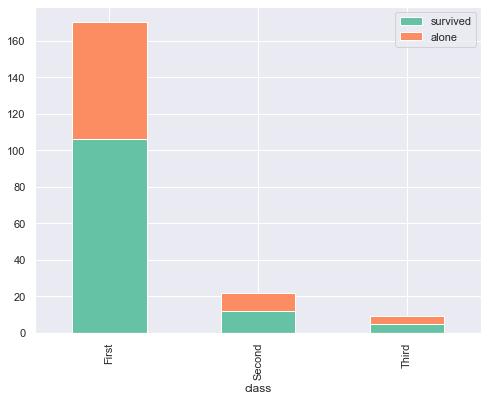

In [415]:
# survived, adult male or alone in each class

df_titanic_class2.plot(kind='bar', stacked='True', figsize=(8,6))

# appears overll more of the people in first class survived
# question, are ther more people in first class overall?

### Line Plots

In [143]:
#import pandas data reader

!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


The following code snippet collects the stock prices of Apple, Microsoft, Google, and Moderna between the given start and end dates. The date, closing price, volume, and stock name are saved in the stocks data frame.

In [144]:
from pandas_datareader import data

In [153]:
# import stock data from pandas

start = '2020-1-1'
end = '2021-6-30'
source = 'yahoo'
stocks = pd.DataFrame(columns=["Date","Close","Volume","Stock"])
stock_list = ["AAPL","IBM","MSFT","MRNA"]
for stock in stock_list:
    df_stock = data.DataReader(stock, start=start ,end=end, 
                         data_source=source).reset_index()
    df_stock["Stock"] = stock
    df_stock = df_stock[["Date","Close","Volume","Stock"]]
    stocks = pd.concat([stocks, df_stock], ignore_index=True)
stock_dataframe = stocks.copy()

In [154]:
stock_dataframe.head()

Date      Close       Volume Stock
0  2020-01-02 00:00:00  75.087502  135480400.0  AAPL
1  2020-01-03 00:00:00  74.357498  146322800.0  AAPL
2  2020-01-06 00:00:00  74.949997  118387200.0  AAPL
3  2020-01-07 00:00:00  74.597504  108872000.0  AAPL
4  2020-01-08 00:00:00  75.797501  132079200.0  AAPL

 **relplot()** This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots.

The lineplot function can be used for drawing line plots as well.

```scatterplot() (with kind="scatter"; the default)```

```lineplot() (with kind="line")```

We only want to see Apple stock prices, we should filter the data points using the stock name. The x and y parameters are used for selecting what to plot on the x and y axis. Finally, the type of plot is determined with the kind parameter. 

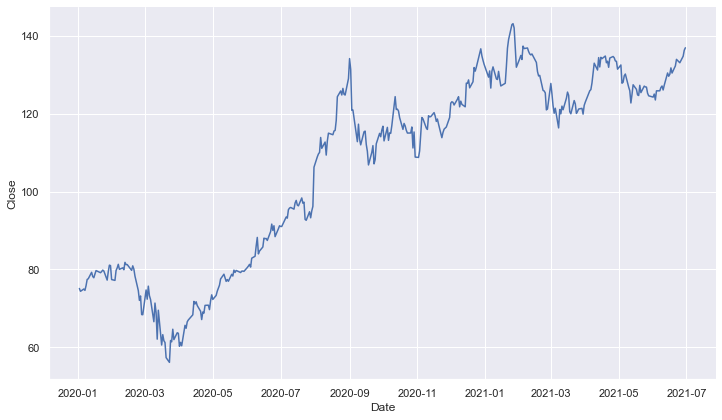

In [181]:
sb.set(style="darkgrid") # set grid style

sb.relplot(data=stocks[stocks.Stock == "AAPL"], x="Date", y="Close", kind="line", height=6, aspect=1.7)
#height for seaborn plot size
# aspect for aspect ratio

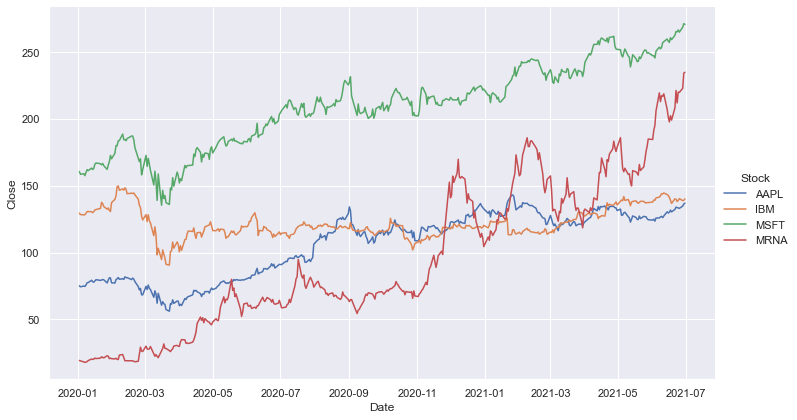

In [182]:
#add dimensions using hue
# show multiple stock line graphs
sb.set(style="darkgrid") # set grid style

sb.relplot(data=stocks, x="Date", y="Close", hue='Stock', kind="line", height=6, aspect=1.7)

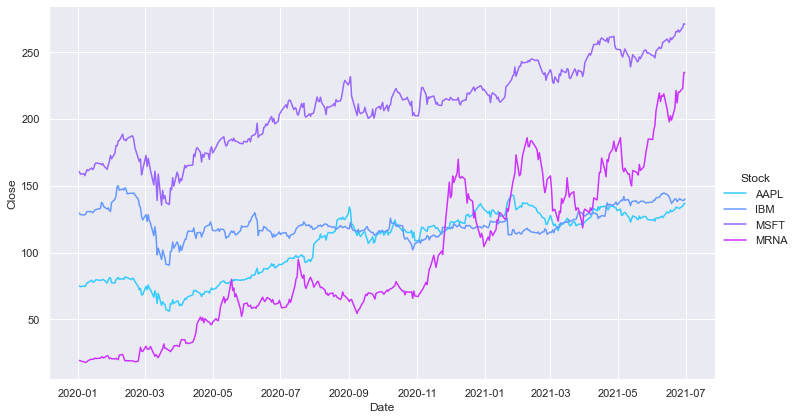

In [183]:
#add dimensions using hue
# show multiple stock line graphs
sb.set(style="darkgrid") # set grid style

#adding color palatte to alter colors
sb.relplot(data=stocks, x="Date", y="Close", hue='Stock', kind="line", palette='cool', height=6, aspect=1.7)

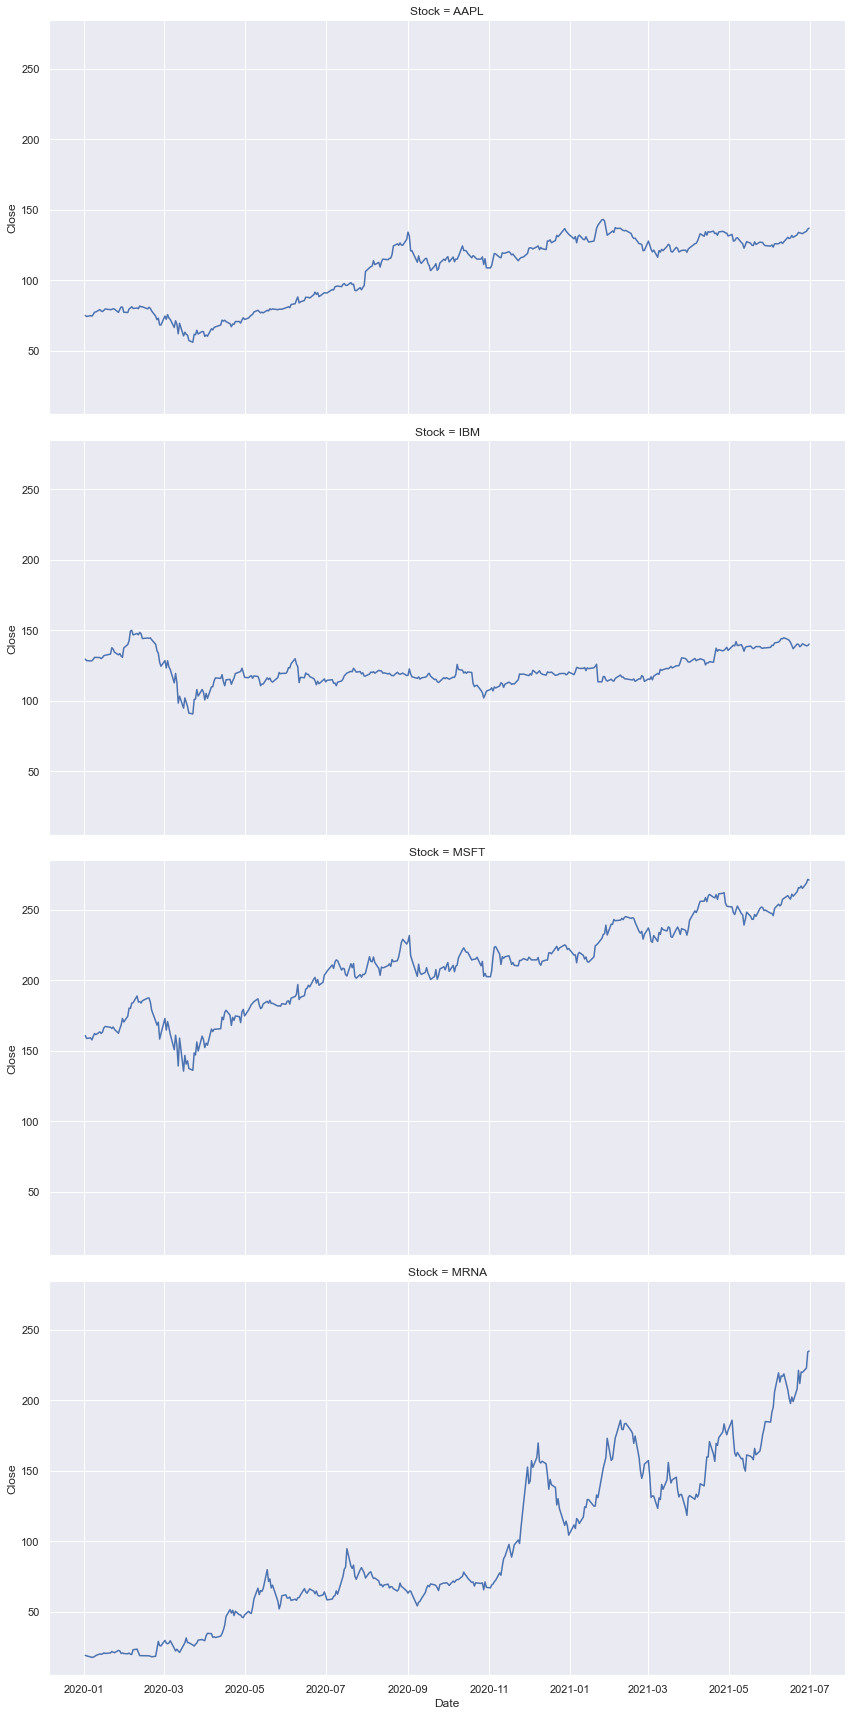

In [190]:
#add dimensions using hue
# show multiple stock line graphs
sb.set(style="darkgrid") # set grid style

#added row = 'Stock' to Facet the chart into multiple separate charts
sb.relplot(data=stocks, x="Date", y="Close", row='Stock', kind="line", palette='cool', height=6, aspect=2)

# Multivariate Exploration of Data

### Non-positional Encodings for Third Variables
There are four major cases to consider when we want to plot three variables together:

Three numeric variables
two numeric variables and one categorical variable
one numeric variable and two categorical variables
three categorical variables
A numerical variable is a variable where the value has meaning (i.e., weight or age), but a value such as a phone number doesn't have meaning in the numbers alone. A categorical variable is a variable that holds a type (i.e., species or hair color).

In [310]:
pokemon_df.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

In [320]:
pokemon_df_sub2= pokemon_df[pokemon_df.type_1.isin(['water', 'normal','grass'])]
pokemon_df_sub2

id    species  generation_id  height  weight  base_experience  type_1  \
0      1  bulbasaur              1     0.7     6.9               64   grass   
1      2    ivysaur              1     1.0    13.0              142   grass   
2      3   venusaur              1     2.0   100.0              236   grass   
6      7   squirtle              1     0.5     9.0               63   water   
7      8  wartortle              1     1.0    22.5              142   water   
..   ...        ...            ...     ...     ...              ...     ...   
778  779    bruxish              7     0.9    19.0              166   water   
779  780     drampa              7     3.0   185.0              170  normal   
786  787  tapu-bulu              7     1.9    45.5              257   grass   
787  788  tapu-fini              7     1.3    21.2              257   water   
797  798    kartana              7     0.3     0.1              257   grass   

      type_2  hp  attack  defense  speed  special-attack  special-defense  
0     poison  45      49       49     45              65               65  
1     poison  60      62       63     60              80               80  
2     poison  80      82       83     80             100              100  
6        NaN  44      48       65     43              50               64  
7        NaN  59      63       80     58              65               80  
..       ...  ..     ...      ...    ...             ...              ...  
778  psychic  68     105       70     92              70               70  
779   dragon  78      60       85     36             135               91  
786    fairy  70     130      115     75              85               95  
787    fairy  70      75      115     85              95              130  
797    steel  59     181      131    109              59               31  

[297 rows x 14 columns]

In [322]:
pokemon_df_sub2= pokemon_df[pokemon_df.type_1.isin(['water', 'normal','grass'])]
pokemon_df_sub3 = pokemon_df_sub2[['type_1','height','weight']]
pokemon_df_sub3

type_1  height  weight
0     grass     0.7     6.9
1     grass     1.0    13.0
2     grass     2.0   100.0
6     water     0.5     9.0
7     water     1.0    22.5
..      ...     ...     ...
778   water     0.9    19.0
779  normal     3.0   185.0
786   grass     1.9    45.5
787   water     1.3    21.2
797   grass     0.3     0.1

[297 rows x 3 columns]

In [329]:
pokemon_df.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

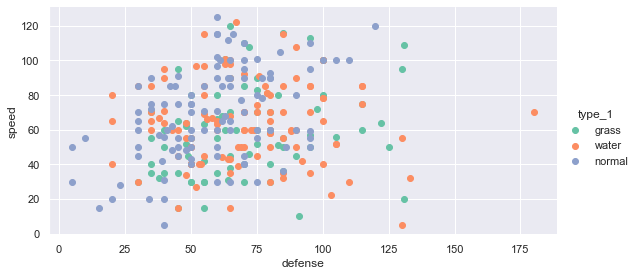

In [343]:
# defense and spped

g = sb.FacetGrid(data = pokemon_df_sub2, hue = 'type_1', height=4, aspect=2)
g.map(plt.scatter, 'defense', 'speed')
g.add_legend()

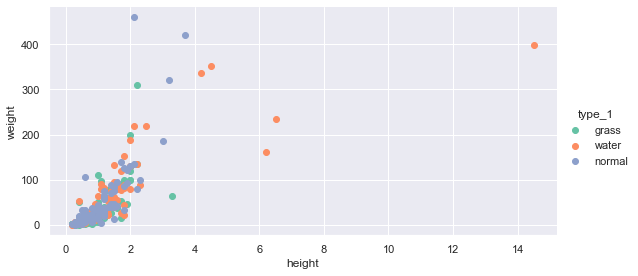

In [344]:
# height and weight

g = sb.FacetGrid(data = pokemon_df_sub2, hue = 'type_1', height=4, aspect=2)
g.map(plt.scatter, 'height', 'weight')
g.add_legend()

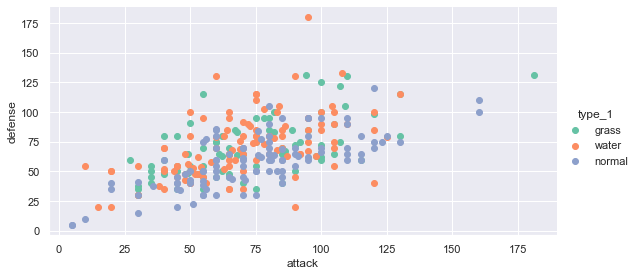

In [345]:
# height and weight

g = sb.FacetGrid(data = pokemon_df_sub2, hue = 'type_1', height=4, aspect=2)
g.map(plt.scatter, 'attack', 'defense')
g.add_legend()

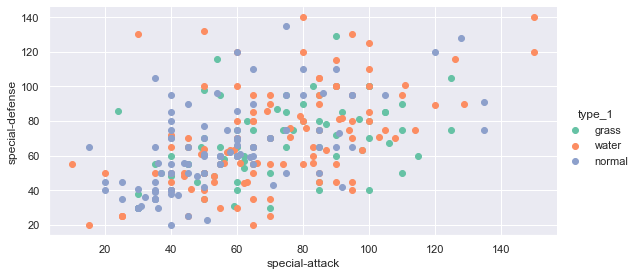

In [346]:
# height and weight

g = sb.FacetGrid(data = pokemon_df_sub2, hue = 'type_1', height=4, aspect=2)
g.map(plt.scatter, 'special-attack', 'special-defense')
g.add_legend()

Q - If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

For quantitative variables, we should not take the same approach, since FacetGrid expects any variable input for subsetting to be categorical. Instead, we can set color based on numeric value in the scatter function through the "c" parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through regplot due to how its "color" argument is set up.)

In [350]:
pokemon_df.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

C:\Users\Dipson\AppData\Local\Temp\ipykernel_12836\1520491652.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Speed')


Text(0, 0.5, 'Special Defense')

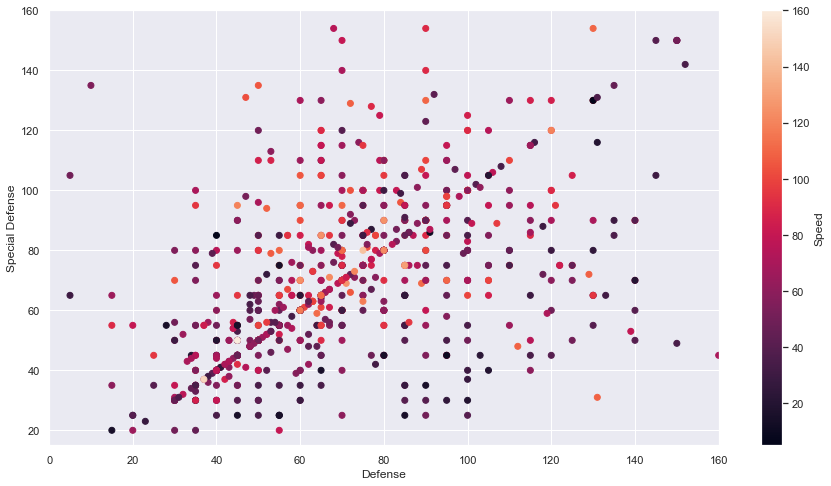

In [351]:
plt.figure(figsize = [15, 8])
plt.scatter(data = pokemon_df, x='defense', y= 'special-defense', c= 'speed')

plt.colorbar(label = 'Speed')
plt.xlim(0,160)  #zoom in on xaxis but be sure to start from zero
plt.ylim(15,160) #zoom in on yaxis

plt.xlabel('Defense')
plt.ylabel('Special Defense')

C:\Users\Dipson\AppData\Local\Temp\ipykernel_12836\2712823318.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Speed')


Text(0, 0.5, 'Special Defense')

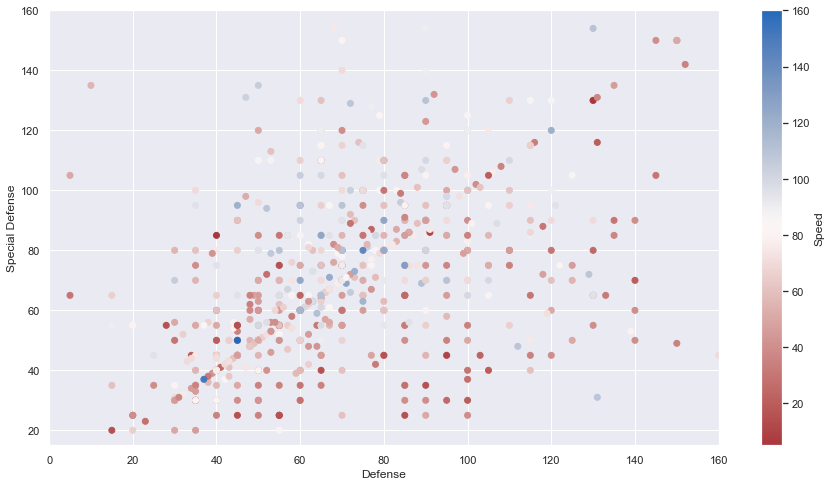

In [354]:
plt.figure(figsize = [15, 8])
plt.scatter(data = pokemon_df, x='defense', y='special-defense', c= 'speed', cmap = 'vlag_r')

plt.colorbar(label = 'Speed')
plt.xlim(0,160)  #zoom in on xaxis but be sure to start from zero
plt.ylim(15,160) #zoom in on yaxis
plt.xlabel('Defense')
plt.ylabel('Special Defense')

I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.

Q - How do weights and heights compare between Fairy type Pokémon and Dragon type

In [360]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon_df.columns.difference(type_cols)

In [364]:
non_type_cols

Index(['attack', 'base_experience', 'defense', 'generation_id', 'height', 'hp',
       'id', 'special-attack', 'special-defense', 'species', 'speed',
       'weight'],
      dtype='object')

In [365]:
pkmn_types = pokemon_df.melt(id_vars = non_type_cols, value_vars = type_cols,  
                          var_name = 'type_level', value_name = 'type').dropna()

In [366]:
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

In [124]:
pokemon_sub

attack  base_experience  defense  generation_id  height   hp   id  \
34        45              113       48              1     0.6   70   35   
35        70              217       73              1     1.3   95   36   
146       64               60       45              1     1.8   41  147   
147       84              147       65              1     4.0   61  148   
148      134              270       95              1     2.2   91  149   
...      ...              ...      ...            ...     ...  ...  ...   
1593     130              257      115              7     1.9   70  787   
1594      75              257      115              7     1.3   70  788   
1605     101              257       53              7     5.5  223  799   
1607      95              270      115              7     1.0   80  801   
1610      73              243       73              7     3.6   73  804   

      special-attack  special-defense    species  speed  weight type_level  \
34                60               65   clefairy     35     7.5     type_1   
35                95               90   clefable     60    40.0     type_1   
146               50               50    dratini     50     3.3     type_1   
147               70               70  dragonair     70    16.5     type_1   
148              100              100  dragonite     80   210.0     type_1   
...              ...              ...        ...    ...     ...        ...   
1593              85               95  tapu-bulu     75    45.5     type_2   
1594              95              130  tapu-fini     85    21.2     type_2   
1605              97               53   guzzlord     43   888.0     type_2   
1607             130              115   magearna     65    80.5     type_2   
1610             127               73  naganadel    121   150.0     type_2   

        type  
34     fairy  
35     fairy  
146   dragon  
147   dragon  
148   dragon  
...      ...  
1593   fairy  
1594   fairy  
1605  dragon  
1607   fairy  
1610  dragon  

[92 rows x 14 columns]

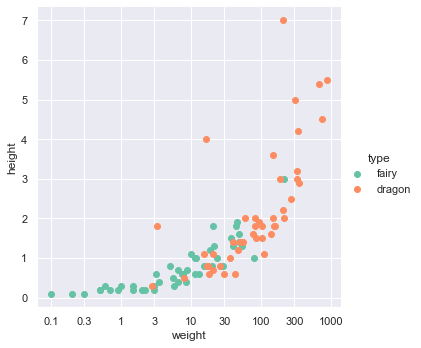

In [367]:
# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', height = 5)
g.map(plt.scatter, 'weight','height')

g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()

* Question - How do weights and heights compare between Fairy type Pokémon and Dragon type
* Answer - The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.

### Faceting for Multivariate Data

You can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

In [ ]:
g = sb.FacetGrid(data = df, col = 'cat_var1', size = 4)
g.map(sb.boxplot, 'cat_var2', 'num_var2')

![box_facet](https://video.udacity-data.com/topher/2018/March/5abc34a1_l5-c05-faceting1/l5-c05-faceting1.png)

In [ ]:
g = sb.FacetGrid(data = df, col = 'cat_var2', row = 'cat_var1', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'num_var1', 'num_var2')

Setting margin_titles = True means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

![scatter with facet grid](https://video.udacity-data.com/topher/2018/March/5abc3ac4_l5-c05-faceting2/l5-c05-faceting2.png)

In [374]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1   94    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2   94    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3   94    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4    0   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   

   ghgScore  
0         4  
1         6  
2         5  
3         5  
4         8

Task 1 -  Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). 

Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [166]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  
fuel_econ['VClass'] = fuel_econ['VClass'].astype('category')

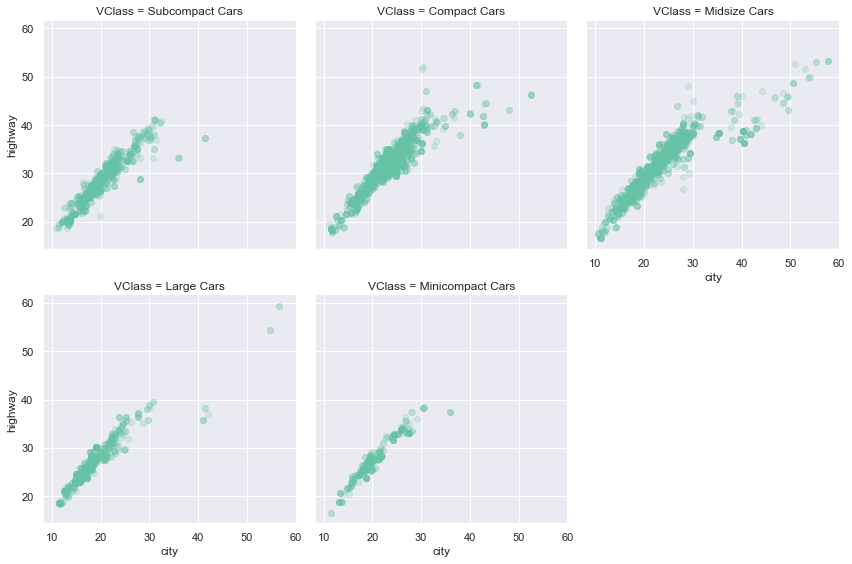

In [375]:
ch = sb.FacetGrid(data = fuel_econ, col = 'VClass', height=4, col_wrap = 3) # height sets the chart size
ch.map(plt.scatter, 'city', 'highway', alpha=1/5)

There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.

In [378]:
fuel_econ.head()

id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1   94    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2   94    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3   94    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4    0   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   

   ghgScore  
0         4  
1         6  
2         5  
3         5  
4         8

Task 2: Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [379]:
fuel_econ_pr = fuel_econ[fuel_econ.fuelType.isin(['Premium Gasoline', 'Regular Gasoline'])]
fuel_econ_pr

id        make             model  year           VClass  \
0     32204      Nissan              GT-R  2013  Subcompact Cars   
1     32205  Volkswagen                CC  2013     Compact Cars   
2     32206  Volkswagen                CC  2013     Compact Cars   
3     32207  Volkswagen        CC 4motion  2013     Compact Cars   
4     32208   Chevrolet    Malibu eAssist  2013     Midsize Cars   
...     ...         ...               ...   ...              ...   
3924  39882      Toyota       Prius Prime  2018     Midsize Cars   
3925  39898     Hyundai     Sonata Hybrid  2018     Midsize Cars   
3926  39899     Hyundai  Sonata Hybrid SE  2018     Midsize Cars   
3927  39900       Lexus            LS 500  2018     Midsize Cars   
3928  39901       Lexus        LS 500 AWD  2018     Midsize Cars   

                  drive                             trans          fuelType  \
0       All-Wheel Drive                   Automatic (AM6)  Premium Gasoline   
1     Front-Wheel Drive                 Automatic (AM-S6)  Premium Gasoline   
2     Front-Wheel Drive                    Automatic (S6)  Premium Gasoline   
3       All-Wheel Drive                    Automatic (S6)  Premium Gasoline   
4     Front-Wheel Drive                    Automatic (S6)  Regular Gasoline   
...                 ...                               ...               ...   
3924  Front-Wheel Drive  Automatic (variable gear ratios)  Regular Gasoline   
3925  Front-Wheel Drive                   Automatic (AM6)  Regular Gasoline   
3926  Front-Wheel Drive                   Automatic (AM6)  Regular Gasoline   
3927   Rear-Wheel Drive                   Automatic (S10)  Premium Gasoline   
3928    All-Wheel Drive                   Automatic (S10)  Premium Gasoline   

      cylinders  displ  pv2  pv4     city    UCity  highway  UHighway  \
0             6    3.8   79    0  16.4596  20.2988  22.5568   30.1798   
1             4    2.0   94    0  21.8706  26.9770  31.0367   42.4936   
2             6    3.6   94    0  17.4935  21.2000  26.5716   35.1000   
3             6    3.6   94    0  16.9415  20.5000  25.2190   33.5000   
4             4    2.4    0   95  24.7726  31.9796  35.5340   51.8816   
...         ...    ...  ...  ...      ...      ...      ...       ...   
3924          4    1.8    0    0  55.2206  78.8197  53.0000   73.6525   
3925          4    2.0    0  106  39.0000  55.9000  44.3066   64.0000   
3926          4    2.0    0  106  40.0000  56.0000  46.0000   64.0000   
3927          6    3.4   99    0  19.2200  24.2000  30.2863   43.4000   
3928          6    3.4   99    0  18.0431  22.6000  27.0000   39.3000   

         comb  co2  feScore  ghgScore  
0     18.7389  471        4         4  
1     25.2227  349        6         6  
2     20.6716  429        5         5  
3     19.8774  446        5         5  
4     28.6813  310        8         8  
...       ...  ...      ...       ...  
3924  54.4329   78       10        10  
3925  41.0000  217        9         9  
3926  42.0000  212        9         9  
3927  23.0021  387        5         5  
3928  21.3945  417        4         4  

[3823 rows x 20 columns]

In [ ]:
displ = numeric
VClass = category
fuelType = category
2 categories


In [380]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [381]:
fuel_econ_pr.VClass.value_counts()

Midsize Cars        1149
Compact Cars        1083
Subcompact Cars      666
Large Cars           604
Minicompact Cars     321
Name: VClass, dtype: int64

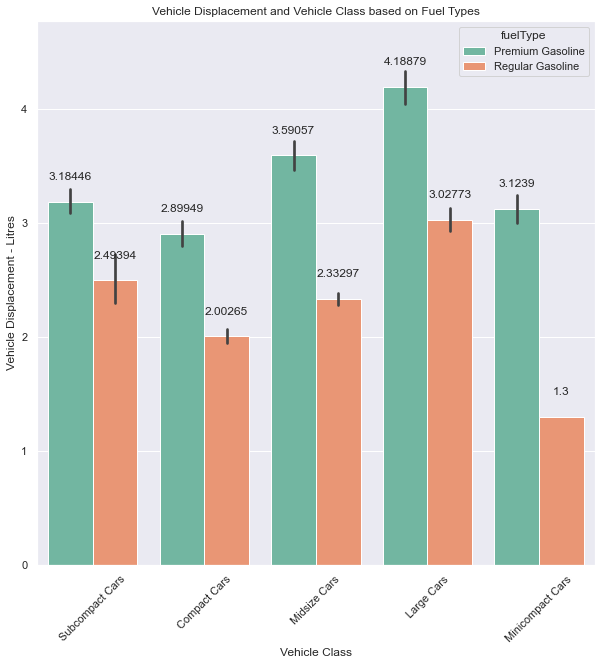

In [382]:
plt.figure(figsize=(10,10))

ax = sb.barplot(data = fuel_econ_pr, x='VClass', y='displ', hue ='fuelType')
plt.legend(ncol=1, loc='upper right', title='fuelType')
plt.xticks(rotation=45) # ax.tick_params(axis='x', rotation=45)

ax.set_title('Vehicle Displacement and Vehicle Class based on Fuel Types')
ax.set_xlabel('Vehicle Class')
ax.set_ylabel('Vehicle Displacement - Litres')
ax.margins(y=0.1)

# show values on the bars
for container in ax.containers:
    ax.bar_label(container, padding=20)
    


How to display custom values on a bar plot

https://stackoverflow.com/questions/43214978/how-to-display-custom-values-on-a-bar-plot

The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.

#### Box plots

```sns.boxplot(y=df['LITH'], x=df['GR']);```

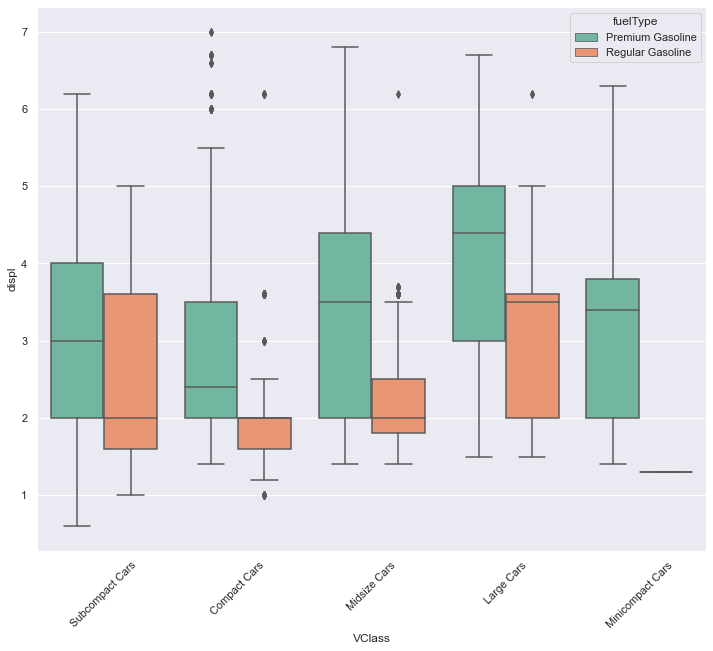

In [384]:
plt.figure(figsize=(12,10))
sb.boxplot(data = fuel_econ_pr,  x='VClass', y='displ', hue ='fuelType')
plt.legend(ncol=1, loc='upper right', title='fuelType')
plt.xticks(rotation=45);

In [129]:
pokemon.head()

id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65

**Plot Matrices**

Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. 

This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

```g = sb.PairGrid(data = df, vars = ['num_var1', 'num_var2', 'num_var3'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)```

![Pairgrid](https://video.udacity-data.com/topher/2018/March/5abd22bb_l5-c08-plotmatrices1/l5-c08-plotmatrices1.png)

The pairplot function can also be used to render this common use case in a single call.

For other relationships, the flexibility of PairGrid shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

```g = sb.PairGrid(data = df, x_vars = ['num_var1', 'num_var2', 'num_var3'],
                y_vars = ['cat_var1','cat_var2'])
g.map(sb.violinplot, inner = 'quartile')```

![pairgrid](https://video.udacity-data.com/topher/2018/March/5abd25bb_l5-c08-plotmatrices2/l5-c08-plotmatrices2.png)